In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
%matplotlib inline

GPU acceleration enabled
using given n: 0
Starting SourceModule Code
Past the SourceModule code
CUDAC Available


In [2]:
f = ppy.instrument.default_m31_filters()


In [3]:
iso_model = ppy.isochrones.Isochrone_Model(f)

In [4]:
driv = ppy.driver.Driver(iso_model)

In [5]:
exposure_ratio = 5.
f[0]._exposure = 3235 * exposure_ratio
f[1]._exposure = 3620 * exposure_ratio

In [6]:
pcmd_m31 = np.loadtxt('../data/m31/m31_r2.pcmd', unpack=True)

In [7]:
gal_m31 = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.2),
    ppy.dustmodels.FixedWidthLogNormDust(0.1),
    ppy.agemodels.TauModel(), 
    ppy.distancemodels.VariableDistance()
    )

In [8]:
gal_m31.set_params(np.array([0., -2., 1.6, 4., 24.42]))
pcmd_true = driv.simulate(gal_m31, 512, shot_noise=True, mag_system='ab')[0]

dm = 5
gal_m31.set_params(np.array([0., -2., 1.6+0.4*dm, 4., 24.42+dm]))
pcmd_alt = driv.simulate(gal_m31, 512, shot_noise=True, mag_system='ab')[0]


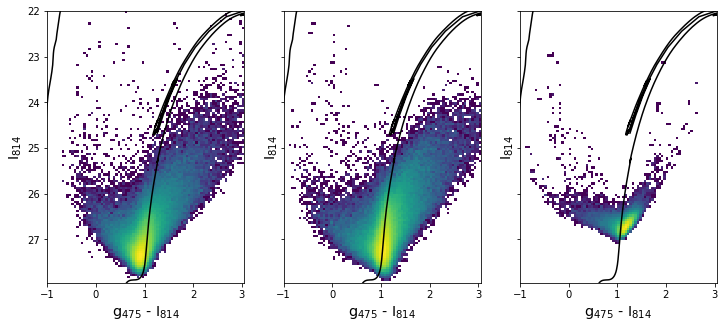

In [9]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 5), sharex=True, sharey=True)
bins = [np.arange(-1, 3.1, 0.05), np.arange(22, 28, 0.05)]
axes[0].hist2d(pcmd_m31[1], pcmd_m31[0], bins=bins, norm=mpl.colors.LogNorm());
axes[1].hist2d(pcmd_true[1], pcmd_true[0], bins=bins, norm=mpl.colors.LogNorm());
axes[2].hist2d(pcmd_alt[1], pcmd_alt[0], bins=bins, norm=mpl.colors.LogNorm());

for ax in axes:
    ppy.plotting.plot_isochrone(iso_model, axes=ax, dmod=24.42, mag_system='ab')

In [10]:
np.median(pcmd_true[1]), np.median(pcmd_alt[1])

(1.072719066726295, 1.1664076025852186)

In [17]:
driv.initialize_data(pcmd_m31, bins=bins[::-1])

In [19]:
driv.loglike(pcmd_true)

-41491.24506248082

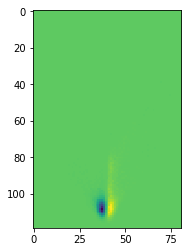

In [18]:
plt.imshow(driv.loglike_map(pcmd_true)[0])

In [23]:
a, b, c = ppy.utils.make_hess(pcmd_m31, bins=bins, boundary=True)

In [27]:
b[:, :-1].shape

(1, 9639)